## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 6: Procesamiento de Lenguaje Natural**
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 6! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicar el análisis de sentimientos a datos de la vida real.
- Realizar la recolección y análisis de sentimientos con las herramientas de Python.
- Generar diferentes gráficas que ayuden a entender los sentimientos generales del _dataset_.

## Proyecto
Usarás el _dataset_ -> https://www.kaggle.com/datasets/kazanova/sentiment140, que tiene más de 1.6 millones de tuits extraídos con la API de Twitter, para realizar lo siguiente:


1. Hacer todo el preprocesamiento de datos, que incluye:
  - Quitar valores nulos
  - Remover los URL de los tuits
  - Remover números
  - Quitar signos de puntuación
  - Eliminar las palabras de parada

2. Generar una gráfica y una nube de palabras de acuerdo con el _target_ del tuit.

3. Realizar la vectorización de los textos y justificar la elección del vectorizador y optimizador.

4. Entrenar un modelo de clasificación, graficar la matriz de confusión, imprimir la precisión y hacer una prueba con un texto que tú escribas.
  - Puedes seleccionar el vectorizador y los optimizadores de tu preferencia.

5. Entrenar el modelo con un segundo algoritmo de clasificación de tu elección y **escribir** las conclusiones de tus resultados.

  - Debes graficar la matriz de confusión, imprimir la precisión y hacer una prueba en un texto con el nuevo modelo.

**NOTA:** Puedes reducir el tamaño del _dataset_ según tu criterio, con el fin de reducir el tiempo de ejecución o evitar que el COLAB se detenga debido al consumo de RAM.

Mucho éxito y recuerda que en las asesorías semanales e individuales tu _coach_ te ayudará con el proyecto.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones |
| -- | -- | -- |
| Actividad 1. Limpieza | 20 | Realiza las siguientes actividades en el _dataset_: quitar valores nulos. Remover las URL de los tuits. Remover números. Quitar signos de puntuación. Eliminar las palabras de parada.|
| Actividad 2. Análisis inicial | 20 | Debes generar una gráfica con leyendas y títulos adecuados para ser leídos por una persona que no sea del área. Además, debes realizar una nube de palabras por cada sentimiento _target_ que tiene el _dataset_.
| Actividad 3. Vectorización | 20 | Para entrenar el modelo de ML, el texto debe estar vectorizado, por ello, debes realizar la vectorización y justificar tus elecciones. Sin las justificaciones, se descontarán puntos. |
| Actividad 4. Entrenamiento 1 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |
| Actividad 5. Entrenamiento 2 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |


In [ ]:
# Se importan las bibliotecas necesarias.
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords  # Importar el conjunto de palabras de parada (stopwords)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
import seaborn as sns

In [ ]:
# Se descarga el archivo y se lo guarda en google drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
Este código de Python utiliza la biblioteca pandas para leer un archivo CSV desde una ubicación en Google
Drive y cargarlo en un DataFrame.

import pandas as pd: Esta línea importa la biblioteca pandas y la renombra como pd. Pandas es una biblioteca
de Python utilizada para el análisis y manipulación de datos, especialmente para datos tabulares.

pd.read_csv('/content/drive/MyDrive/Sentiment_archive.zip', encoding='latin-1', header=None): pd.read_csv()
es una función de pandas que lee un archivo CSV y lo carga en un DataFrame. En este caso, está leyendo un
archivo CSV que está comprimido en un archivo ZIP ubicado en la ruta '/content/drive/MyDrive/Sentiment_archive.zip'.
Los parámetros opcionales encoding='latin-1' se utilizan para especificar la codificación del archivo (en este caso, 'latin-1'),
y header=None se utiliza para indicar que no hay una fila de encabezado en el archivo CSV.

df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']: Esta línea asigna nombres de columna específicos al
DataFrame df. Esto es útil cuando el archivo CSV no tiene una fila de encabezado y queremos asignar nombres de columna
personalizados. Aquí, estamos asignando los nombres 'target', 'ids', 'date', 'flag', 'user', y 'text' a las columnas del
DataFrame en el orden correspondiente.

En resumen, este código carga un archivo CSV desde un archivo ZIP ubicado en Google Drive en un DataFrame de pandas.
Luego, asigna nombres de columna específicos a las columnas del DataFrame.

"""
df = pd.read_csv('/content/drive/MyDrive/Sentiment_archive.zip', encoding='latin-1', header=None)
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [ ]:
"""
Este código imprime la cantidad de ocurrencias de cada valor único en la columna 'target' del DataFrame df,
lo que nos da una idea de la distribución de los valores en esa columna.

df['target']: Accede a la columna llamada 'target' en el DataFrame df. Esto devuelve una serie de pandas
que contiene los valores de la columna 'target'.

.value_counts(): Este es un método de la serie en pandas que cuenta la frecuencia de cada valor único en
la serie. En este caso, cuenta la frecuencia de cada valor único en la columna 'target'.

print(...): Imprime el resultado del método .value_counts() en la consola.

"""
print(df['target'].value_counts())

0    800000
4    800000
Name: target, dtype: int64


El data frame df tiene la misma cantidad de tweets positivos que negativos, 800000 de cada uno.

In [ ]:
"""
Se reduce el tamaño del dataset.

df es un DataFrame, que es una estructura de datos tabular de pandas.

df.sample(frac=0.05, random_state=91): Este es un método de DataFrame llamado sample().
Este método se utiliza para obtener una muestra aleatoria de las filas del DataFrame.

frac=0.05: Este parámetro indica la fracción de filas que se seleccionarán aleatoriamente.
En este caso, se está seleccionando el 5% de las filas (0.05 es el 5% en forma decimal).

random_state=91: Este parámetro se utiliza para establecer una semilla para el generador
de números aleatorios. Establecer una semilla garantiza que obtengamos la misma muestra
aleatoria cada vez que ejecutemos el código. El número 91 es solo un valor arbitrario utilizado
como semilla en este caso. Puede ser cualquier número entero.

En resumen, este código selecciona aleatoriamente el 5% de las filas del DataFrame df,
utilizando una semilla específica para asegurar la reproducibilidad de los resultados.

"""
df = df.sample(frac=0.05, random_state=91)

In [ ]:
# Se imprimen los 5 primeros registros del dataset utilizando la función de pandas .head().
df.head()

,target,ids,date,flag,user,text
1017662,4,1881885911,Fri May 22 05:46:58 PDT 2009,NO_QUERY,meghanmbiro,@chriswoodward Claim it
313444,0,2001752937,Tue Jun 02 01:57:26 PDT 2009,NO_QUERY,DCeventjunkie,"@ sydney airport, waiting to board for LA.... ..."
816924,4,1551586982,Sat Apr 18 09:27:00 PDT 2009,NO_QUERY,MrsCatwoman,@mirandabuzz http://twitpic.com/3flr4 - i thin...
1486507,4,2068096666,Sun Jun 07 13:29:36 PDT 2009,NO_QUERY,RyanFerguson83,Going ring shopping with the lady
536243,0,2198325551,Tue Jun 16 15:55:17 PDT 2009,NO_QUERY,JonasBros4life,@selenagomez OMG! Thanx 4 letting me know! :O ...


# **Actividad 1: Limpieza de datos**

In [ ]:
"""
Este código de Python define una función llamada preprocess_text que realiza varias operaciones de preprocesamiento de texto.

def preprocess_text(text):: Esta línea define una función llamada preprocess_text que toma un argumento de entrada llamado text.
Esta función se encarga de preprocesar el texto que se le pase como argumento.

text = re.sub(r'http\S+', '', text): Esta línea utiliza la biblioteca re de Python para realizar una sustitución de patrones
en el texto. Elimina cualquier URL que pueda estar presente en el texto.
re.sub(): Es una función que realiza sustituciones de patrones en un texto.
r'http\S+': Este es el patrón de expresión regular que coincide con cualquier URL.
\S+ coincide con uno o más caracteres que no son espacios en blanco, lo que significa que coincide con cualquier secuencia
de caracteres que no sea un espacio en blanco (es decir, una URL que no contiene espacios).
'': Esto indica que se reemplazará cualquier URL encontrada en el texto con una cadena vacía,
 es decir, se eliminarán las URLs.

text = re.sub(r'\d+', '', text): Esta línea también utiliza re.sub() para eliminar cualquier número (dígitos) del texto.
\d+: Este patrón de expresión regular coincide con uno o más dígitos.
'': Esto indica que se reemplazarán los números encontrados en el texto con una cadena vacía, es decir, se eliminarán los números.

text = re.sub(r'[^\w\s]', '', text): Esta línea elimina cualquier signo de puntuación del texto, dejando solo letras y espacios.
[^\w\s]: Este patrón de expresión regular coincide con cualquier carácter que no sea una letra, un dígito o un espacio en blanco.
'': Esto indica que se reemplazarán los signos de puntuación con una cadena vacía, es decir, se eliminarán del texto.

text = text.lower(): Esta línea convierte todo el texto a minúsculas. Esto es útil para asegurarse de que las palabras
se traten de manera uniforme, independientemente de si están en mayúsculas o minúsculas en el texto original.

stop_words = set(stopwords.words('english')): Esta línea carga un conjunto de palabras de parada (stopwords) en inglés.
Las palabras de parada son palabras muy comunes que se suelen eliminar del texto durante el procesamiento, ya que no
aportan mucho significado. Ejemplos de palabras de parada en inglés son "the", "a", "an", etc.

words = text.split(): Esta línea divide el texto en palabras individuales, creando una lista de palabras.

filtered_words = [word for word in words if word not in stop_words]: Esta línea filtra las palabras del
texto para eliminar las palabras de parada.
word for word in words: Esto es una expresión de comprensión de lista que recorre cada palabra en la lista de palabras.
if word not in stop_words: Esto filtra las palabras para incluir solo aquellas que no están en el conjunto de palabras de parada.

return ' '.join(filtered_words): Finalmente, esta línea une las palabras filtradas de nuevo en una cadena de texto, separadas por
espacios, y devuelve esta cadena de texto como resultado de la función.

En resumen, esta función preprocess_text toma un texto como entrada y realiza una serie de pasos de preprocesamiento para limpiar
y normalizar el texto, incluyendo la eliminación de URLs, números, signos de puntuación, conversión a minúsculas y eliminación de
palabras de parada en inglés.


"""
def preprocess_text(text):
    # Quitar URL
    text = re.sub(r'http\S+', '', text)
    # Quitar números
    text = re.sub(r'\d+', '', text)
    # Quitar signos de puntuación
    text = re.sub(r'[^\w\s]', '', text)
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar palabras de parada
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [ ]:
"""
Este código de Python utiliza la biblioteca NLTK (Natural Language Toolkit) para descargar el conjunto de palabras de
parada (stopwords) en inglés, y luego aplica la función preprocess_text definida anteriormente a una columna llamada
'text' en un DataFrame llamado df, para crear una nueva columna llamada 'clean_text'.

import nltk: Esta línea importa la biblioteca NLTK, que es una biblioteca popular para el procesamiento
del lenguaje natural en Python.

nltk.download('stopwords'): Esta línea descarga el conjunto de palabras de parada en inglés proporcionado por NLTK.
Las palabras de parada son palabras comunes que generalmente se eliminan del texto durante el preprocesamiento,
ya que no aportan mucho significado al análisis.

df['clean_text'] = df['text'].apply(preprocess_text): Esta línea aplica la función preprocess_text a cada elemento
de la columna 'text' del DataFrame df, y asigna el resultado a una nueva columna llamada 'clean_text'.
df['text']: Esto accede a la columna llamada 'text' en el DataFrame df, que contiene texto que se va a preprocesar.
.apply(preprocess_text): Esto aplica la función preprocess_text a cada elemento de la columna 'text'. La función apply()
se utiliza para aplicar una función a cada elemento de una columna o DataFrame en pandas.
df['clean_text']: Esto crea una nueva columna llamada 'clean_text' en el DataFrame df y asigna los resultados del
preprocesamiento a esta columna.

En resumen, este código descarga el conjunto de palabras de parada en inglés proporcionado por NLTK y luego aplica
la función preprocess_text a una columna de texto en un DataFrame, para preprocesar y limpiar el texto, y luego guarda
los resultados en otra columna llamada 'clean_text'.

"""
import nltk
nltk.download('stopwords')

df['clean_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Actividad 2: Generar gráfica y nube de palabras**

In [ ]:
"""
Este código de Python realiza varias tareas para generar una gráfica de nube de palabras a partir del DataFrame
df que contiene texto preprocesado.

Importación de bibliotecas:
import pandas as pd: Importa la biblioteca pandas y la renombra como pd. Pandas es una biblioteca de análisis de datos en Python.
import numpy as np: Importa la biblioteca NumPy y la renombra como np. NumPy es una biblioteca para realizar cálculos numéricos en Python.
import re: Importa el módulo re, que proporciona operaciones de coincidencia de expresiones regulares en Python.
import nltk: Importa la biblioteca NLTK (Natural Language Toolkit), que es una biblioteca popular para el procesamiento del
lenguaje natural en Python.
from nltk.corpus import stopwords: Importa el conjunto de palabras de parada (stopwords) de NLTK. Las palabras de parada son
palabras comunes que generalmente se eliminan del texto durante el preprocesamiento.
from wordcloud import WordCloud: Importa la clase WordCloud de la biblioteca wordcloud,
que se utiliza para generar nubes de palabras.
import matplotlib.pyplot as plt: Importa la biblioteca Matplotlib, que se utiliza para generar gráficos en Python.

Función plot_wordcloud:
Esta función toma un argumento llamado sentiment, que indica el sentimiento para el cual se generará la nube de palabras.
Filtra el DataFrame df para obtener solo las filas que corresponden al sentimiento dado.
Crea un conjunto de palabras de parada específico para el idioma inglés utilizando NLTK.
Utiliza la clase WordCloud para generar una nube de palabras a partir del texto preprocesado en la columna
'clean_text' del DataFrame filtrado.
Configura varias opciones de la nube de palabras, como el tamaño, el color de fondo, el tamaño de fuente mínimo
y las palabras de parada.
Muestra la nube de palabras utilizando Matplotlib con la función plt.imshow() y configura el tamaño de la figura.
Oculta los ejes y elige un diseño ajustado para la visualización.
Muestra el título de la nube de palabras basado en el sentimiento proporcionado.
Finalmente, muestra la nube de palabras utilizando plt.show().

En resumen, este código importa bibliotecas necesarias, define una función para generar nubes de palabras
a partir de texto preprocesado en un DataFrame, y luego llama a esta función para generar nubes
de palabras para sentimientos específicos.

"""
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(sentiment):
    df_sentiment = df[df['target'] == sentiment]
    stop_words = set(stopwords.words('english'))
    wordcloud = WordCloud(width=800, height=800,
                    background_color='white',
                    stopwords=stop_words,
                    min_font_size=10).generate(' '.join(df_sentiment['clean_text']))
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f'Wordcloud for sentiment {sentiment}')
    plt.show()

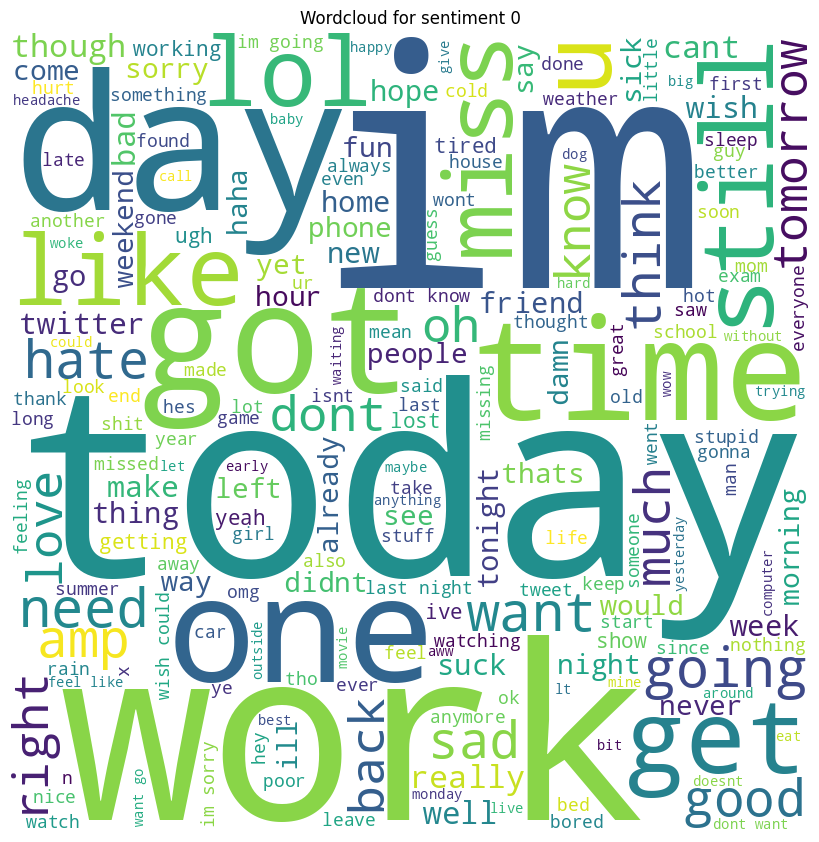

In [ ]:
#Llamada a la función plot_wordcloud. 'plot_wordcloud(0)': Genera una nube de palabras para el sentimiento negativo (sentiment = 0).
plot_wordcloud(0)

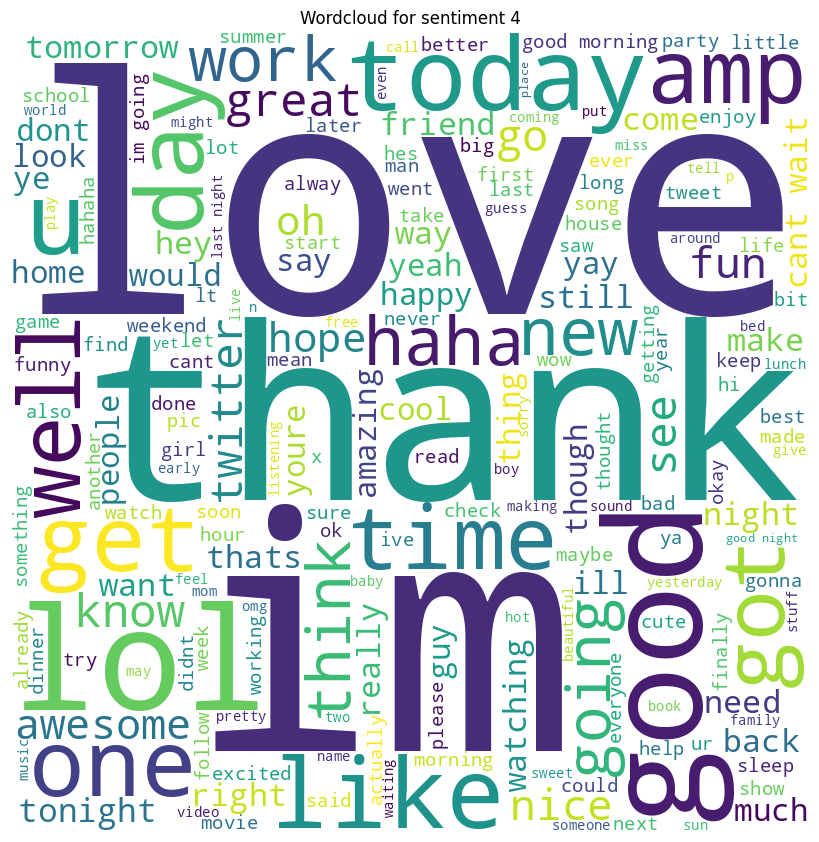

In [ ]:
# Llamada a la función plot_wordcloud.'plot_wordcloud(4)': Genera una nube de palabras para el sentimiento positivo (sentiment = 4).
plot_wordcloud(4) # Sentimiento positivo

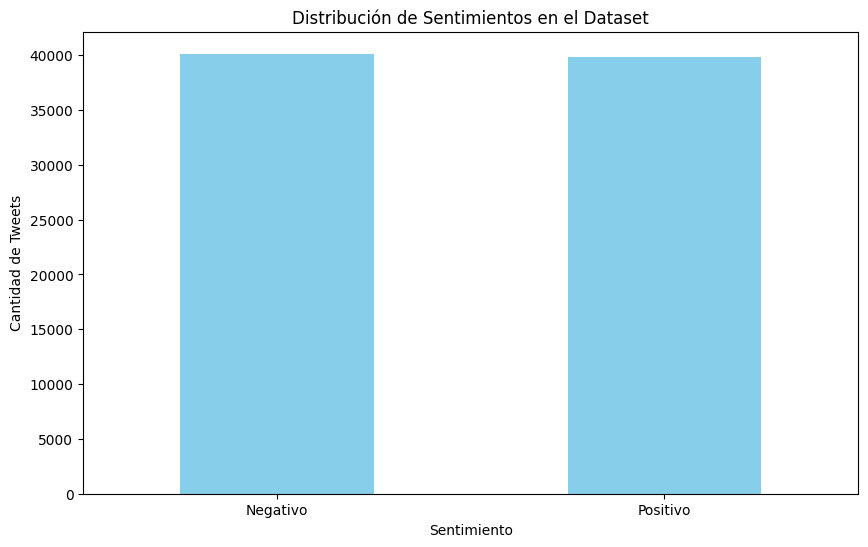

In [ ]:
"""
Este código genera un gráfico de barras que muestra la distribución de los sentimientos en el dataset,
etiquetando los ejes y proporcionando un título para una mejor comprensión de los datos.

sentiment_counts = df['target'].value_counts(): Este código calcula la cantidad de ocurrencias de cada
valor único en la columna 'target' del DataFrame df. El resultado es una serie que contiene la cantidad
de tweets para cada valor único de sentimiento.

"""
sentiment_counts = df['target'].value_counts()

"""
sentiment_counts.index = ['Negativo', 'Positivo']: Aquí se modifican los índices de la serie sentiment_counts
para que reflejen los nombres 'Negativo' y 'Positivo' en lugar de los valores originales (0 y 4) que
representan los sentimientos en el dataset.

"""
sentiment_counts.index = ['Negativo', 'Positivo']

"""
plt.figure(figsize=(10, 6)): Se crea una nueva figura para el gráfico con un tamaño de 10x6 pulgadas.

"""
plt.figure(figsize=(10, 6))

"""
sentiment_counts.plot(kind='bar', color='skyblue'): Este código genera un gráfico de barras que representa
la distribución de los sentimientos. La función .plot() se utiliza aquí con el argumento kind='bar' para
especificar el tipo de gráfico. También se especifica el color de las barras como 'skyblue'.

"""
sentiment_counts.plot(kind='bar', color='skyblue')

"""
plt.title('Distribución de Sentimientos en el Dataset'): Establece el título del gráfico como
'Distribución de Sentimientos en el Dataset'.

"""
plt.title('Distribución de Sentimientos en el Dataset')

"""
plt.xlabel('Sentimiento'): Etiqueta el eje x del gráfico como 'Sentimiento'.

"""
plt.xlabel('Sentimiento')

"""
plt.ylabel('Cantidad de Tweets'): Etiqueta el eje y del gráfico como 'Cantidad de Tweets'.

"""
plt.ylabel('Cantidad de Tweets')

"""
plt.xticks(rotation=0): Este código rota las etiquetas del eje x en 0 grados, lo
que significa que se muestran horizontalmente para facilitar la lectura.

"""
plt.xticks(rotation=0)

"""
plt.show(): Muestra el gráfico.

"""
plt.show()


# **Actividad 3: Vectorización**

In [ ]:
"""
Este código de Python utiliza TfidfVectorizer de la biblioteca sklearn.feature_extraction.text para convertir
un conjunto de textos en una matriz TF-IDF (Term Frequency-Inverse Document Frequency).

vectorizer = TfidfVectorizer(): Esto crea un objeto TfidfVectorizer. TF-IDF es una técnica que se utiliza comúnmente
para representar documentos como vectores numéricos, en la que se tienen en cuenta tanto la frecuencia de las palabras
en el documento como la frecuencia inversa del documento en el corpus total. TfidfVectorizer es una clase de scikit-learn
que se utiliza para convertir una colección de documentos de texto en una matriz de características TF-IDF.

X = vectorizer.fit_transform(df['clean_text']): Esto utiliza el método fit_transform() del objeto TfidfVectorizer para
convertir la columna 'clean_text' del DataFrame df en una matriz TF-IDF.

fit_transform(): Este método primero ajusta el vectorizador al texto (aprendiendo el vocabulario y el IDF) y luego
transforma los documentos en la representación TF-IDF.
df['clean_text']: Esto accede a la columna 'clean_text' del DataFrame df, que contiene texto limpio y preprocesado.
y = df['target']: Esto asigna la columna 'target' del DataFrame df a la variable y. Esta columna generalmente contiene
las etiquetas (o targets) asociadas con cada texto en el DataFrame. La variable y generalmente representa la variable
de destino que se va a predecir en un problema de aprendizaje supervisado.

En resumen, este código utiliza TfidfVectorizer para convertir una colección de textos en una representación numérica TF-IDF,
y luego asigna las etiquetas correspondientes a la variable y. Este tipo de representación vectorial es comúnmente utilizada
para alimentar modelos de aprendizaje automático, donde los algoritmos requieren que los datos
de entrada sean representados numéricamente.

"""
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['target']

Elección del vectorizador (TfidfVectorizer):

TF-IDF: Term Frequency-Inverse Document Frequency es una técnica comúnmente utilizada en procesamiento de texto para convertir texto en vectores numéricos. Esta técnica asigna puntuaciones a las palabras basadas en su importancia relativa en un documento y en un corpus más grande. TF-IDF es útil para representar características importantes y eliminar palabras comunes que no aportan información, lo que puede mejorar el rendimiento del modelo.
Justificación: En el procesamiento de texto, es común utilizar TF-IDF debido a su capacidad para manejar grandes volúmenes de texto y para representar eficazmente características significativas. La elección de TF-IDF como vectorizador es apropiada para este conjunto de datos de tweets, ya que ayuda a capturar la importancia de las palabras en los tweets y a eliminar palabras comunes sin significado.

Elección del clasificador (Random Forest y SVM):

Random Forest: Es un clasificador de conjunto que utiliza múltiples árboles de decisión y combina sus predicciones para obtener una predicción final. Es robusto y puede manejar bien datos de alta dimensionalidad como el texto. Es útil para detectar patrones complejos en los datos y es menos propenso al sobreajuste en comparación con un solo árbol de decisión.
SVM (Support Vector Machine): Es un clasificador lineal que encuentra el hiperplano que mejor separa las clases en el espacio de características. SVM es eficaz en espacios de alta dimensión y es adecuado para problemas de clasificación binaria como el que nos toca abordar. Además, al utilizar un kernel lineal, SVM puede ser especialmente útil cuando los datos son linealmente separables en el espacio de características.
Justificación: Ambos clasificadores son ampliamente utilizados en problemas de clasificación de texto y tienen sus propias ventajas. Random Forest es robusto y fácil de usar, mientras que SVM puede ser eficaz en problemas de clasificación binaria con alta dimensionalidad. La elección de utilizar ambos modelos proporciona una comparación entre ellos y puede ayudar a determinar cuál funciona mejor para nuestro conjunto de datos.

En resumen, la elección del vectorizador (TF-IDF) y los clasificadores (Random Forest y SVM) se basa en su efectividad y adecuación para el procesamiento de texto y problemas de clasificación de alta dimensionalidad. Estas elecciones se justifican por su capacidad para capturar características importantes del texto y para manejar eficazmente la complejidad del problema de clasificación de tus tweets.

# **Actividad 4: Entrenamiento del modelo 1**

In [ ]:
"""
Este código utiliza la función train_test_split de scikit-learn para dividir un conjunto de datos en conjuntos
de entrenamiento y prueba.
X es la matriz de características o variables independientes.
y es el vector de la variable dependiente o la etiqueta.
test_size=0.2 especifica que el 20% de los datos se utilizarán como conjunto de prueba y el 80% restante
se utilizará como conjunto de entrenamiento.
random_state=91 establece una semilla para la generación de números aleatorios. Esto garantiza que la división
del conjunto de datos sea reproducible, es decir, si se ejecuta el código varias veces con la misma semilla,
obtendrá la misma división de los datos.
Resultados de la división:

X_train: La matriz de características para el conjunto de entrenamiento.
X_test: La matriz de características para el conjunto de prueba.
y_train: El vector de etiquetas para el conjunto de entrenamiento.
y_test: El vector de etiquetas para el conjunto de prueba.

"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=91)

In [ ]:
"""
Este código utiliza el algoritmo de Random Forest para crear un modelo de clasificación y hacer predicciones.
Esta línea importa la clase RandomForestClassifier del módulo ensemble de la biblioteca scikit-learn.
RandomForestClassifier es un clasificador basado en ensambles que utiliza el algoritmo de Random
Forest para la clasificación.
Se crea un objeto de RandomForestClassifier con los siguientes parámetros:
n_estimators=100: Especifica el número de árboles en el bosque. En este caso, se utilizarán 100 árboles.
random_state=91: Establece una semilla para la generación de números aleatorios. Esto garantiza
que el proceso de entrenamiento sea reproducible.
Se entrena el modelo utilizando el conjunto de entrenamiento (X_train y y_train). El modelo aprenderá
a mapear las características (X_train) a las etiquetas (y_train).
Se realizan predicciones utilizando el modelo entrenado en el conjunto de prueba (X_test). El resultado
se almacena en rf_pred, que contendrá las etiquetas predichas para el conjunto de prueba.

"""
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=91)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
"""
Este código calcula la matriz de confusión y la precisión del modelo de Random Forest.
conf_matrix_rf = confusion_matrix(y_test, rf_pred): se calcula la matriz de confusión comparando
las etiquetas verdaderas del conjunto de prueba (y_test) con las etiquetas predichas por el modelo
de Random Forest (rf_pred). La matriz de confusión es una tabla que muestra el número de predicciones
correctas e incorrectas para cada clase.
accuracy_rf = accuracy_score(y_test, rf_pred): Se calcula la precisión del modelo comparando las etiquetas
verdaderas del conjunto de prueba (y_test) con las etiquetas predichas por el modelo de Random Forest (rf_pred).
La precisión se define como la fracción de predicciones correctas sobre el total de predicciones.
print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)
Se imprimen la precisión del modelo y la matriz de confusión en la salida estándar. Esto permite visualizar
la precisión del modelo y cómo se distribuyen las predicciones correctas e incorrectas en la matriz de confusión.

"""
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)

Random Forest Accuracy: 0.759
Confusion Matrix (Random Forest):
 [[5981 2078]
 [1778 6163]]


La salida muestra la precisión del modelo de Random Forest y la matriz de confusión asociada.

Precisión del modelo (Accuracy):

La precisión del modelo es del 75.9%, lo que significa que el modelo clasificó correctamente el 75.9% de todas las muestras de prueba.

Matriz de confusión:

La matriz de confusión es una tabla que describe el rendimiento del modelo en la clasificación de muestras en cada clase.
En la matriz de confusión, las filas representan las clases reales (en este caso, negativo y positivo), mientras que las columnas representan las clases predichas por el modelo.
Los valores de la matriz indican la cantidad de muestras en cada categoría. Es decir, la celda en la fila i y la columna j indica cuántas muestras de la clase i se clasificaron como clase j.

En este caso, la matriz de confusión tiene cuatro celdas:
Verdaderos negativos (TN): 5981. Estas son las muestras que fueron correctamente clasificadas como negativas.
Falsos positivos (FP): 2078. Estas son las muestras que fueron incorrectamente clasificadas como positivas.
Falsos negativos (FN): 1778. Estas son las muestras que fueron incorrectamente clasificadas como negativas.
Verdaderos positivos (TP): 6163. Estas son las muestras que fueron correctamente clasificadas como positivas.

En resumen, el modelo de Random Forest tiene una precisión del 75.9%, y la matriz de confusión muestra cómo se distribuyen las clasificaciones del modelo entre las clases reales y predichas. En este caso, parece que el modelo tiene un buen rendimiento, con un número considerable de verdaderos positivos y verdaderos negativos.

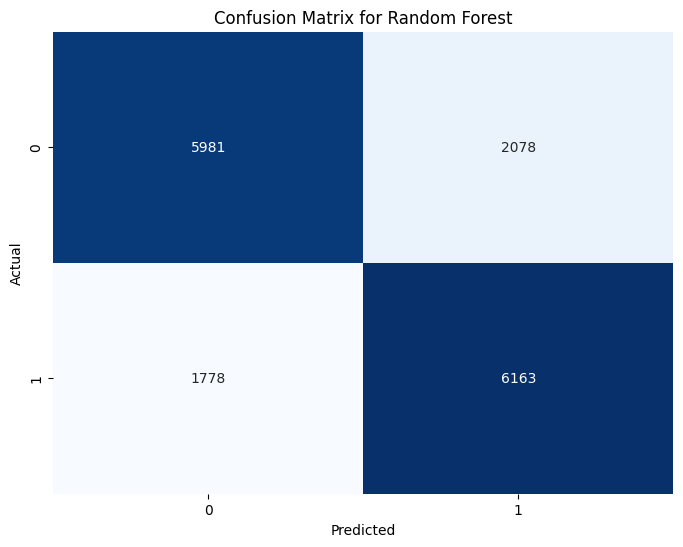

In [ ]:
"""
Este código se encarga de visualizar la matriz de confusión del modelo de Random Forest
como un mapa de calor utilizando la biblioteca Seaborn en Python.
plt.figure(figsize=(8, 6)): Esta línea crea una nueva figura de matplotlib con un tamaño
específico. En este caso, la figura tiene una anchura de 8 pulgadas y una altura de 6 pulgadas.
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False): Se utiliza la función heatmap
de Seaborn para representar la matriz de confusión (conf_matrix_rf) como un mapa de calor.
Los parámetros utilizados son:
conf_matrix_rf: La matriz de confusión que se va a visualizar.
annot=True: Anota cada celda con los valores correspondientes de la matriz de confusión.
fmt='d': Formato de los números en las celdas (en este caso, enteros).
cmap='Blues': Esquema de color utilizado para el mapa de calor (en este caso, una
paleta de colores azules).
cbar=False: No se muestra la barra de colores en el lateral del mapa de calor.
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
Estas líneas establecen el título del gráfico y etiquetan los ejes x e y para indicar qué representan.
plt.show(): Esta línea muestra el mapa de calor generado en la figura de matplotlib.

"""
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

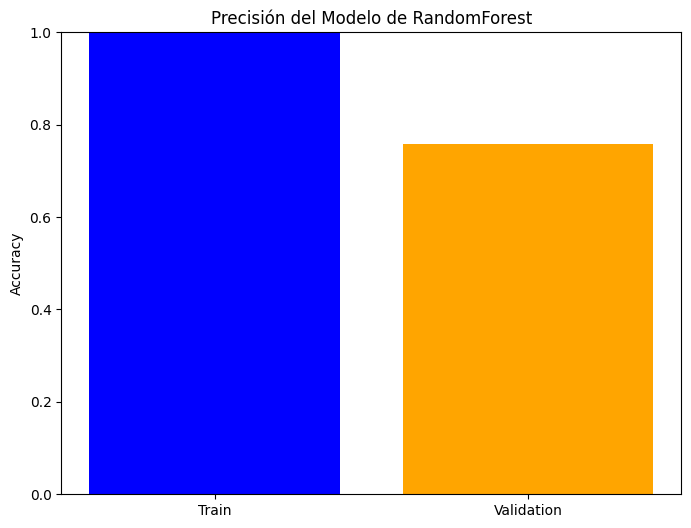

In [ ]:
"""
Este código visualiza la precisión del modelo de RandomForest en los datos de entrenamiento y
validación mediante un gráfico de barras para comparar la precisión entre ambos conjuntos de datos.

train_accuracy = rf_model.score(X_train, y_train): Este código calcula la precisión del modelo
de RandomForest en los datos de entrenamiento. Utiliza el método score() del modelo RandomForest
(rf_model) para calcular la precisión, pasando como argumentos las características de entrenamiento
(X_train) y las etiquetas de entrenamiento (y_train).

"""
train_accuracy = rf_model.score(X_train, y_train)

"""
val_accuracy = rf_model.score(X_test, y_test): Similar al paso anterior, este código calcula la
precisión del modelo de RandomForest en los datos de validación. Utiliza el mismo método score()
del modelo RandomForest (rf_model), pero esta vez se pasan las características de validación
(X_test) y las etiquetas de validación (y_test).

"""
val_accuracy = rf_model.score(X_test, y_test)

"""
plt.figure(figsize=(8, 6)): Se crea una nueva figura para el gráfico con un tamaño de 8x6 pulgadas.

"""
plt.figure(figsize=(8, 6))

"""
plt.bar(['Train', 'Validation'], [train_accuracy, val_accuracy], color=['blue', 'orange']):
Este código genera un gráfico de barras que muestra la precisión del modelo en los datos de
entrenamiento y validación. Utiliza la función plt.bar() para crear las barras, donde el eje x
tiene etiquetas 'Train' y 'Validation', y el eje y tiene los valores de precisión
correspondientes. Además, se especifica el color de las barras como 'blue' para los datos de
entrenamiento y 'orange' para los datos de validación.

"""
plt.bar(['Train', 'Validation'], [train_accuracy, val_accuracy], color=['blue', 'orange'])

"""
plt.title('Precisión del Modelo de RandomForest'): Establece el título del gráfico
como 'Precisión del Modelo de RandomForest'.

"""

plt.title('Precisión del Modelo de RandomForest')

"""
plt.ylabel('Accuracy'): Etiqueta el eje y del gráfico como 'Accuracy' (precisión).

"""
plt.ylabel('Accuracy')

"""
plt.ylim(0, 1): Establece los límites del eje y del gráfico de 0 a 1, ya que
la precisión siempre está en el rango de 0 a 1.

"""
plt.ylim(0, 1)

"""
plt.show(): Muestra el gráfico.

"""
plt.show()

In [ ]:
"""
texto_prueba = "I am very happy with that product": Se define una variable texto_prueba que contiene
un texto de ejemplo para probar el modelo de clasificación.

"""
texto_prueba = "I am very happy with that product"

"""
texto_prueba_procesado = preprocess_text(texto_prueba): Se aplica la función preprocess_text()
al texto de prueba para realizar el preprocesamiento. Esto implica eliminar URL, números, signos
de puntuación, convertir a minúsculas y eliminar palabras de parada

"""
texto_prueba_procesado = preprocess_text(texto_prueba)

"""
texto_prueba_vectorizado = vectorizer.transform([texto_prueba_procesado]): Se utiliza el
vectorizador (vectorizer) previamente ajustado para transformar el texto de prueba preprocesado
en una representación vectorial adecuada para la entrada del modelo. Se envuelve el texto
preprocesado en una lista [texto_prueba_procesado] porque el método transform() espera una lista de textos.

"""
texto_prueba_vectorizado = vectorizer.transform([texto_prueba_procesado])

"""
prediccion = rf_model.predict(texto_prueba_vectorizado): Se utiliza el modelo de clasificación RandomForest
(rf_model) para predecir el sentimiento del texto de prueba. Se aplica el método predict() al vector del
texto de prueba vectorizado (texto_prueba_vectorizado).

"""
prediccion = rf_model.predict(texto_prueba_vectorizado)

"""
if prediccion[0] == 0:: Se verifica el valor de la predicción. Si es igual a 0, se interpreta
como un sentimiento negativo.

print("El sentimiento del texto es: Negativo"): Si la predicción es 0, se imprime un mensaje
indicando que el sentimiento del texto es negativo. De lo contrario, se asume que es positivo.

"""
if prediccion[0] == 0:
    print("El sentimiento del texto es: Negativo")
else:
    print("El sentimiento del texto es: Positivo")

El sentimiento del texto es: Positivo


Se observa que el modelo predice correctamente el sentimiento presente en el texto que le proporcionamos.

# **Actividad 5: Entrenamiento del modelo 2**

In [ ]:
"""
Este código crea, entrena y utiliza un modelo de SVM con un kernel lineal para clasificar datos.
El modelo aprende a separar las clases en el espacio de características utilizando un hiperplano
de separación lineal y luego hace predicciones sobre un conjunto de datos de prueba.
svm_model = SVC(kernel='linear'): Se crea un objeto de la clase SVC con el parámetro kernel establecido
en 'linear'. Esto significa que se utilizará un kernel lineal para separar las clases en el espacio de
características. Un kernel lineal es adecuado para problemas de clasificación linealmente separables.
svm_model.fit(X_train, y_train): Se entrena el modelo SVM utilizando el conjunto de datos de entrenamiento.
X_train representa las características de entrenamiento y y_train son las etiquetas correspondientes.
El modelo aprenderá a clasificar correctamente los datos de entrenamiento utilizando un hiperplano de
separación lineal en el espacio de características.
svm_pred = svm_model.predict(X_test): Se utilizan las características del conjunto de datos de prueba (X_test)
para hacer predicciones utilizando el modelo SVM entrenado. Las predicciones se almacenan en la variable svm_pred.

"""
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [ ]:
"""
Este código calcula la precisión del modelo de SVM y muestra la matriz de confusión, lo que proporciona
una evaluación detallada del rendimiento del modelo en el conjunto de prueba. La precisión indica la
proporción de predicciones correctas del modelo, mientras que la matriz de confusión desglosa las
predicciones correctas e incorrectas para cada clase.
conf_matrix_svm = confusion_matrix(y_test, svm_pred): Se calcula la matriz de confusión comparando
las etiquetas verdaderas del conjunto de prueba (y_test) con las etiquetas predichas por el modelo SVM
(svm_pred). La matriz de confusión es una tabla que muestra el número de predicciones correctas
e incorrectas para cada clase.
accuracy_svm = accuracy_score(y_test, svm_pred): Se calcula la precisión del modelo comparando las
etiquetas verdaderas del conjunto de prueba (y_test) con las etiquetas predichas por el modelo
SVM (svm_pred). La precisión se define como la fracción de predicciones correctas
sobre el total de predicciones.
print("SVM Accuracy:", accuracy_svm)
print("Confusion Matrix (SVM):\n", conf_matrix_svm)
Se imprimen la precisión del modelo y la matriz de confusión en la salida estándar. Esto permite visualizar
la precisión del modelo y cómo se distribuyen las predicciones correctas e incorrectas en la matriz de confusión.

"""
conf_matrix_svm = confusion_matrix(y_test, svm_pred)
accuracy_svm = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", accuracy_svm)
print("Confusion Matrix (SVM):\n", conf_matrix_svm)


SVM Accuracy: 0.7644375
Confusion Matrix (SVM):
 [[5962 2097]
 [1672 6269]]


La salida incluye la precisión del modelo SVM y su matriz de confusión asociada.

Precisión del modelo (Accuracy):

La precisión del modelo SVM es del 76.44%, lo que significa que el modelo clasificó correctamente el 76.44% de todas las muestras de prueba.

Matriz de confusión:

Al igual que con la matriz de confusión del modelo de Random Forest, esta matriz muestra el rendimiento del modelo en la clasificación de muestras en cada clase.
Las filas representan las clases reales (en este caso, negativo y positivo), mientras que las columnas representan las clases predichas por el modelo.
Los valores en la matriz indican la cantidad de muestras en cada categoría.

Específicamente, la matriz de confusión muestra:

Verdaderos negativos (TN): 5962. Muestras que fueron correctamente clasificadas como negativas.
Falsos positivos (FP): 2097. Muestras que fueron incorrectamente clasificadas como positivas.
Falsos negativos (FN): 1672. Muestras que fueron incorrectamente clasificadas como negativas.
Verdaderos positivos (TP): 6269. Muestras que fueron correctamente clasificadas como positivas.

En resumen, el modelo SVM tiene una precisión del 76.44%, y la matriz de confusión muestra cómo se distribuyen las clasificaciones del modelo entre las clases reales y predichas. Similar al modelo de Random Forest, parece que el modelo SVM también tiene un buen rendimiento, con un número considerable de verdaderos positivos y verdaderos negativos.







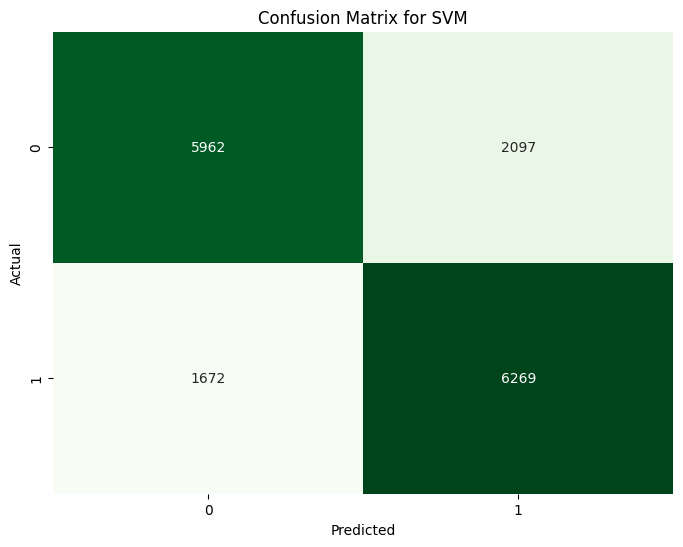

In [ ]:
"""
Este código utiliza la biblioteca Seaborn para visualizar la matriz de confusión del modelo SVM como un mapa de calor.
plt.figure(figsize=(8, 6)): Esta línea crea una nueva figura de matplotlib con un tamaño específico. En este caso,
la figura tiene una anchura de 8 pulgadas y una altura de 6 pulgadas.
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens', cbar=False): Se utiliza la función heatmap de Seaborn
para representar la matriz de confusión (conf_matrix_svm) como un mapa de calor.
Los parámetros utilizados son:
conf_matrix_svm: La matriz de confusión que se va a visualizar.
annot=True: Anota cada celda con los valores correspondientes de la matriz de confusión.
fmt='d': Formato de los números en las celdas (en este caso, enteros).
cmap='Greens': Esquema de color utilizado para el mapa de calor (en este caso, una paleta de colores verdes).
cbar=False: No se muestra la barra de colores en el lateral del mapa de calor.
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
Estas líneas establecen el título del gráfico y etiquetan los ejes x e y para indicar qué representan.
plt.show(): Esta línea muestra el mapa de calor generado en la figura de matplotlib.

"""
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
"""
train_accuracy_svm = svm_model.score(X_train, y_train): Se utiliza el método score() del modelo SVM
(svm_model) para calcular la precisión en los datos de entrenamiento (X_train, y_train). Este método
devuelve la precisión del modelo en los datos de entrenamiento.

"""
train_accuracy_svm = svm_model.score(X_train, y_train)

In [ ]:
"""
val_accuracy_svm = svm_model.score(X_test, y_test): Se utiliza el método score() del modelo SVM
para calcular la precisión en los datos de validación (X_test, y_test). Este método devuelve la
precisión del modelo en los datos de validación.

"""
val_accuracy_svm = svm_model.score(X_test, y_test)

In [ ]:
"""
print("Accuracy (Train - SVM):", train_accuracy_svm): Se imprime la precisión del modelo SVM
en los datos de entrenamiento.
print("Accuracy (Validation - SVM):", val_accuracy_svm): Se imprime la precisión del modelo SVM
en los datos de validación.

"""
print("Accuracy (Train - SVM):", train_accuracy_svm)
print("Accuracy (Validation - SVM):", val_accuracy_svm)

Accuracy (Train - SVM): 0.890921875
Accuracy (Validation - SVM): 0.7644375


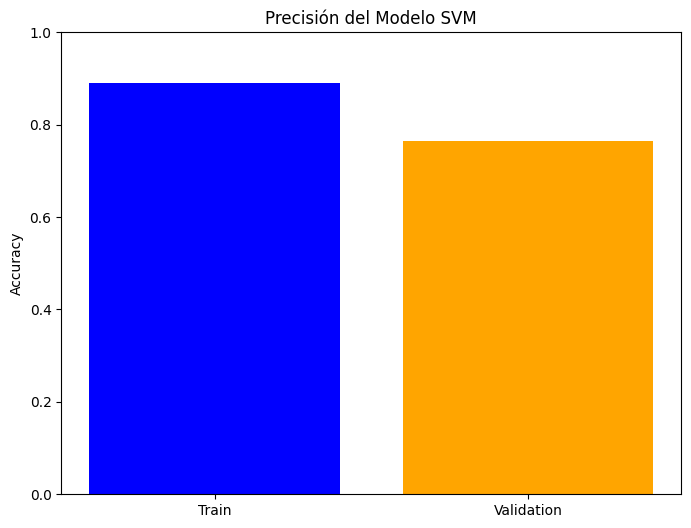

In [ ]:
"""
Se crea un gráfico de barras para visualizar la precisión del modelo SVM en los datos de entrenamiento
y validación. Se utilizan las variables train_accuracy_svm y val_accuracy_svm como alturas de las barras
correspondientes. La barra azul representa la precisión en los datos de entrenamiento y la barra naranja
representa la precisión en los datos de validación.

plt.title('Precisión del Modelo SVM'): Se establece el título del gráfico como "Precisión del Modelo SVM".

plt.ylabel('Accuracy'): Se etiqueta el eje y del gráfico como "Accuracy" (precisión).

plt.ylim(0, 1): Se establece el rango del eje y del gráfico de 0 a 1, ya que la precisión está en ese rango.

plt.show(): Se muestra el gráfico de barras.

"""
plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Validation'], [train_accuracy_svm, val_accuracy_svm], color=['blue', 'orange'])
plt.title('Precisión del Modelo SVM')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [ ]:
"""
prediccion_svm = svm_model.predict(texto_prueba_vectorizado): Utilizamos el método predict()
del modelo SVM (svm_model) para predecir el sentimiento del texto de prueba vectorizado
(texto_prueba_vectorizado). Este método devuelve la predicción del modelo para el
texto de prueba.

"""
prediccion_svm = svm_model.predict(texto_prueba_vectorizado)

"""
if prediccion[0] == 0:: Comprobamos si la predicción del modelo es igual a 0, lo que indica un
sentimiento negativo. Esto se hace comparando el primer elemento de la variable prediccion
(que contiene la predicción del modelo) con 0.

print("El sentimiento del texto es: Negativo"): Si la predicción es igual a 0, imprimimos
"El sentimiento del texto es: Negativo", lo que significa que el modelo predijo un sentimiento
negativo para el texto de prueba.

else:: En caso contrario (si la predicción no es igual a 0), ejecutamos el siguiente bloque de código.

print("El sentimiento del texto es: Positivo"): Si la predicción no es igual a 0, imprimimos
"El sentimiento del texto es: Positivo", lo que significa que el modelo predijo un sentimiento
positivo para el texto de prueba.

"""
if prediccion[0] == 0:
    print("El sentimiento del texto es: Negativo")
else:
    print("El sentimiento del texto es: Positivo")

El sentimiento del texto es: Positivo


Se observa que el modelo predice correctamente el sentimiento presente en el texto que le proporcionamos.

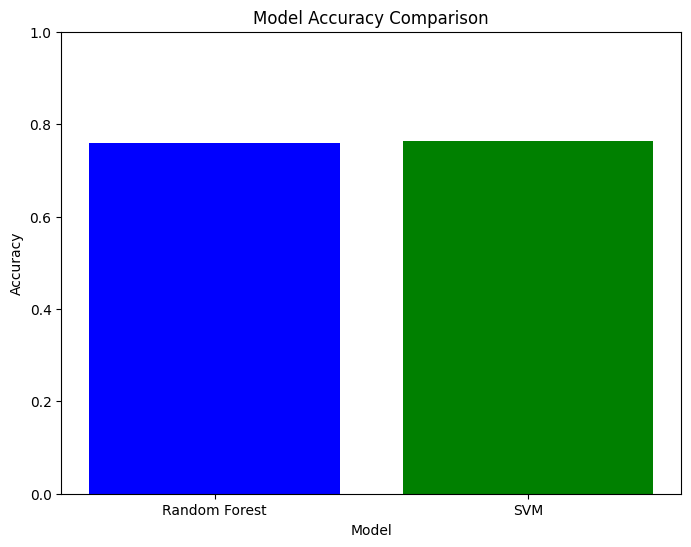

In [ ]:
"""
Este código visualiza de manera comparativa la precisión de dos modelos de clasificación (Random Forest y SVM)
utilizando un gráfico de barras. Esto permite una rápida comparación de rendimiento entre los dos modelos.
Las barras de colores representan las precisiones respectivas de cada modelo.
models = ['Random Forest', 'SVM']
accuracies = [accuracy_rf, accuracy_svm]
Se definen dos listas: models contiene los nombres de los modelos, y accuracies contiene las precisión de
cada modelo. En este caso, accuracy_rf corresponde a la precisión del modelo de Random Forest y accuracy_svm
corresponde a la precisión del modelo SVM.
plt.figure(figsize=(8, 6)): Se crea una nueva figura de matplotlib con un tamaño específico. En este caso,
la figura tiene una anchura de 8 pulgadas y una altura de 6 pulgadas.
plt.bar(models, accuracies, color=['blue', 'green']): Se utiliza la función bar de matplotlib para crear el
gráfico de barras. Los modelos se representan en el eje x y las precisión se representan en el eje y.
El parámetro color especifica el color de las barras, donde 'blue' corresponde al modelo de
Random Forest y 'green' al modelo SVM.
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
Estas líneas establecen el título del gráfico, y etiquetan los ejes x e y para indicar qué representan.
plt.ylim(0, 1)
Se establece el rango del eje y de 0 a 1 para mostrar la precisión en un rango adecuado.
plt.show(): Esta línea muestra el gráfico de barras generado en la figura de matplotlib.

"""
models = ['Random Forest', 'SVM']
accuracies = [accuracy_rf, accuracy_svm]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

En la gráfica de barras se observa que ambos modelos tienen casi la misma Accuracy (precisión). El modelo que aplica random forest tiene una precisión de 75.9 % en tanto que el que utiliza SVM alcanza un 76.4%. Ambos modelos tienen un buen rendimiento, con un número considerable de verdaderos positivos y verdaderos negativos.